In [1]:
# Install diffprivlib if not installed
!pip install diffprivlib

import pandas as pd
import numpy as np
import random
from diffprivlib.mechanisms import Laplace

# Load dataset
df = pd.read_csv("bank_add_full.csv")

# Convert 'housing' column: "yes" → 1, "no" → 0
df["loan"] = df["loan"].map({"yes": 1, "no": 0})


# Select the column to apply randomized response
select_col1 = df["loan"]


def diff_privacy(data):

    # Initialize randomized response counters
    yescount = 0
    nocount = 0
    
    # Apply the Coin Flip Randomized Response
    for value in data:
        coin1 = random.randint(1, 2)  # Heads = 1, Tails = 2
        
        if coin1 == 2:  # Tails → Respond truthfully
            if value == 1:  # Original answer was "yes"
                yescount += 1
            else:
                nocount += 1
        else:  # Heads → Flip again and randomize response
            coin2 = random.randint(1, 2)
            if coin2 == 1:
                yescount += 1  # Force "yes"
            else:
                nocount += 1  # Force "no"
    
    # Calculate the observed noisy proportion
    yes_proportion = yescount / (yescount + nocount)
    
    # Estimate the true fraction of people with property P
    estimated_p = 2 * (yes_proportion - 0.25)
    estimated_p = max(0, min(1, estimated_p))  # Ensure it's in range [0,1]

    return yes_proportion, yescount, nocount, estimated_p



def randomized_diff_privacy(data, N_iter): 
    '''
    Randomized differential privacy process.
    Input: data column, N_iter number of iterations
    Output: average of output variables from diff_privacy (yes_proportion, yescount, nocount, estimated_p) for N_iter
    '''
    #initialize variables as zero
    Yes_proportion = 0
    Yescount = 0
    Nocount= 0
    Estimated_p = 0

    #repeat computation N_iter times, adding the outputs
    for _ in range(N_iter):
        yes_proportion, yescount, nocount, estimated_p = diff_privacy(data)
        Yes_proportion += yes_proportion
        Yescount += yescount
        Nocount += nocount
        Estimated_p += estimated_p

    #return averages
    return Yes_proportion/N_iter, Yescount/N_iter, Nocount/N_iter, Estimated_p/N_iter


Yes_proportion, Yescount, Nocount, Estimated_p = randomized_diff_privacy(select_col1, 100)

# Display results
print(f"Randomized Yes Count: {Yescount}")
print(f"Randomized No Count: {Nocount}")
print(f"Observed Proportion (Noisy): {Yes_proportion:.3f}")
print(f"Estimated True Proportion: {Estimated_p:.3f}")

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
    ----------------


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bezad\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\bezad\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bezad\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\bezad\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\bezad\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\bezad\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\bezad\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\bezad\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [19]:
Yes = []
No = []
Est_p = []

for N_iter in np.arange(50, 501, 50):
    Yes_proportion, Yescount, Nocount, Estimated_p = randomized_diff_privacy(select_col1, N_iter)
    Yes.append(Yes_proportion)
    

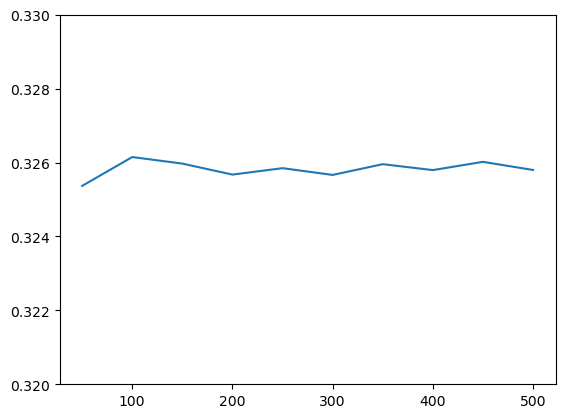

In [44]:
import matplotlib.pyplot as plt
plt.ylim(ymin = 0.32, ymax=0.33)
plt.plot(np.arange(50, 501, 50), Yes);

In [ ]:
# Apply the Laplace Mechanism for Differential Privacy
sensitivity = 1 / len(df)  # Fix sensitivity calculation
epsilon = 0.5  # Privacy budget
noise_scale = sensitivity / epsilon

# Generate Laplace noise
laplace_noise = np.random.laplace(0, noise_scale)

# Apply noise to the estimated proportion
laplace_mechanism = estimated_p + laplace_noise
laplace_mechanism = max(0, min(1, laplace_mechanism))  # Keep in range [0,1]

# Display DP results
print(f"Noisy Proportion with Laplace Mechanism: {laplace_mechanism:.3f}")

# Show first few rows of the housing column
print(df[["loan"]].head())

   housing
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN


C:\Users\bezad\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\bezad\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6764: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

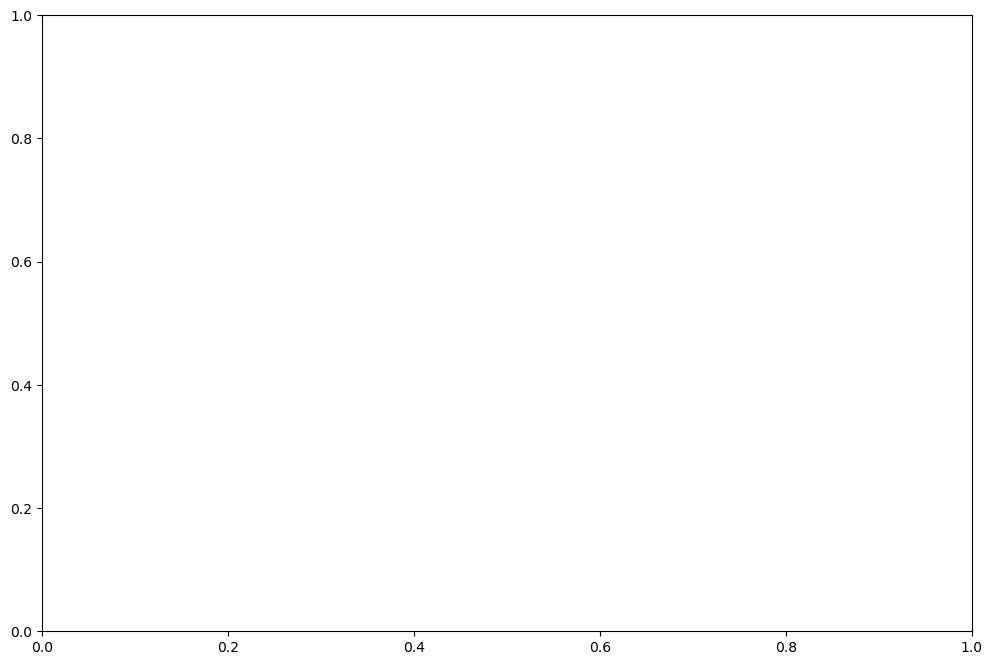

In [51]:
!pip install pandas numpy matplotlib diffprivlib

import numpy as np
import matplotlib.pyplot as plt

# Convert 'housing' column: "yes" → 1, "no" → 0
df["housing"] = df["housing"].map({"yes": 1, "no": 0})

# Display the first few rows
print(df[["housing"]].head())

# Define different epsilon values for comparison
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]
sensitivity = 1 / len(df)  # Sensitivity for Laplace noise

# Store noisy estimates for each epsilon
noisy_estimates = {}

for epsilon in epsilon_values:
    noise_scale = sensitivity / epsilon
    laplace_noise = np.random.laplace(0, noise_scale, size=len(df))
    noisy_estimates[epsilon] = np.clip(df["housing"] + laplace_noise, 0, 1)  # Ensure values stay in [0,1]

# Plot histograms for different epsilon values
plt.figure(figsize=(12, 8))
for epsilon in epsilon_values:
    plt.hist(noisy_estimates[epsilon], bins=20, alpha=0.6, label=f"ε = {epsilon}", density=True)

# Mark true data distribution
plt.hist(df["housing"], bins=2, alpha=0.8, color='black', edgecolor='white', linewidth=1.2, label="Original Data", density=True)

# Formatting
plt.xticks([0, 1], ["No", "Yes"])
plt.xlabel("Housing Response")
plt.ylabel("Density")
plt.title("Impact of ε on Noisy Housing Data with Laplace Mechanism")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [43]:
import pandas as pd
import numpy as np
import random

# Load dataset
df = pd.read_csv("bank_add_full.csv")

# Convert 'housing' column: "yes" → 1, "no" → 0
df["housing"] = df["housing"].map({"yes": 1, "no": 0})

# Select the column to apply randomized response
select_col2 = df["housing"]  # Now using select_col2 instead of select_col1

# Initialize randomized response counters
yescount = 0
nocount = 0

# Apply the Coin Flip Randomized Response
for value in select_col2:
    coin1 = random.randint(1, 2)  # Heads = 1, Tails = 2
    
    if coin1 == 2:  # Tails → Respond truthfully
        if value == 1:  # Original answer was "yes"
            yescount += 1
        else:
            nocount += 1
    else:  # Heads → Flip again and randomize response
        coin2 = random.randint(1, 2)
        if coin2 == 1:
            yescount += 1  # Force "yes"
        else:
            nocount += 1  # Force "no"

# Prevent division by zero
total_count = yescount + nocount
if total_count == 0:
    yes_proportion = 0  # Avoid division error
else:
    yes_proportion = yescount / total_count  # Calculate observed noisy proportion

# Estimate the true fraction of people with property P
estimated_p = 2 * (yes_proportion - 0.25)
estimated_p = max(0, min(1, estimated_p))  # Ensure it's in range [0,1]

# Display results
print(f"Randomized Yes Count: {yescount}")
print(f"Randomized No Count: {nocount}")
print(f"Observed Proportion (Noisy): {yes_proportion:.3f}")
print(f"Estimated True Proportion: {estimated_p:.3f}")

# Apply the Laplace Mechanism for Differential Privacy
sensitivity = 1 / len(df)  # Sensitivity calculation (1 change per participant)
epsilon = 1.0  # Privacy budget
noise_scale = sensitivity / epsilon

# Generate Laplace noise
laplace_noise = np.random.laplace(0, noise_scale)

# Apply noise to the estimated proportion
laplace_mechanism = estimated_p + laplace_noise
laplace_mechanism = max(0, min(1, laplace_mechanism))  # Keep in range [0,1]

# Display DP results
print(f"Noisy Proportion with Laplace Mechanism: {laplace_mechanism:.3f}")

# Show first few rows of the housing column
print(df[["housing"]].head())


Randomized Yes Count: 21084
Randomized No Count: 20104
Observed Proportion (Noisy): 0.512
Estimated True Proportion: 0.524
Noisy Proportion with Laplace Mechanism: 0.524
   housing
0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
